## Feature Selection with scikit-learn (sklearn)
Jaganadh Gopinadhan
http://jaganadhg.in 

Feature extraction is one of the essential step in Data Science/Machine Learning and Data Mining exercises. Effective use of feature extraction techniques helps a Data Scientist to build the best model. This note is intent to give a brief over view on feature selection with scikit-learn (sklearn). The result of a feature selection exercise is to find the most important and descriptive feature from a given data.

## Note
The code is for getting familiarity with the utilities.

#### Find K-Best features for classification and regression
The first method which we are going to explore is the selecting the K-best features using the SelectKBest utility in sklearn. We will use the famous IRIS two class data-set.

The first example we are going to look is feature selection for classification.

In [52]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(data_frame, target, k=2):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

iris_data = pd.read_csv("/resources/iris.csv")

kbest_feat = select_kbest_clf(iris_data, "Class", k=2)
kbest_feat = kbest_feat.sort(["F Score", "P Value"], ascending=[False, False])
kbest_feat


,F Score,P Value,Support,Attribute
2,2498.618817,1.504801e-71,True,petal-length
3,1830.624469,3.230375e-65,True,petal-width
0,236.735022,6.892546e-28,False,sepal-length
1,41.607003,4.246355e-09,False,sepal-width


##### What just happened ?
The selectkbest function accepts a pandas DataFrame, and target variable name and k as parameters. First we create a SelectKBest object with estimator as f_classif (because we are working with a classification problem). The we are fitting the model with the data. Once we fit the model information on feature importance will be available in the fitted model. The Annova F score of the features are accessible through the scores attributes and the p-values are available through the pvalues_. The get_support function will return a bool value if a feature is selected.

Now the question is how can I determine which feature is selected? The easy way is that if the Support is Tru those features are are good. The higher the F Score and the lesser the p-values the feature is best.

Let's examine the results we obtained from the iris data. The attributes 'petal-length' and 'petal-width' got higher F Score and lesser P Value; and Support is true. So those feature are important compared to other features. To understand the real-power of this method you have to check this with a data with more dimensions.

##### Next ....
In the next example we can try to see how we can apply this technique to a regression problem. Basically there is not much difference in the code. We will change the estimator to f_regression. We can try this with the Boston house price dataset.

In [53]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression


def select_kbest_reg(data_frame, target, k=5):
    """
    Selecting K-Best features for regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

boston = pd.read_csv("/resources/boston.csv")

kbest_feat = select_kbest_reg(boston, "price", k=5)

kbest_feat = kbest_feat.sort(["F Score", "P Value"], ascending=[False, False])
kbest_feat


,F Score,P Value,Support,Attribute
12,601.617871,5.081103e-88,True,12
5,471.846740,2.487229e-74,True,5
10,175.105543,1.609509e-34,True,10
2,153.954883,4.900260e-31,True,2
9,141.761357,5.637734e-29,True,9
4,112.591480,7.065042e-24,False,4
0,88.151242,2.083550e-19,False,0
8,85.914278,5.465933e-19,False,8
6,83.477459,1.569982e-18,False,6
1,75.257642,5.713584e-17,False,1


#####  Select features according to a percentile of the highest scores.
The next trick we are going to explore is 'SelectPercentile' based feature selection. This technique will return the features base on percentile of the highest score. Let's see it in action with Boston data.

In [54]:
import pandas as pd
from sklearn.feature_selection import SelectPercentile, f_regression


def select_percentile(data_frame, target, percentile=15):
    """
    Percentile based feature selection for regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectPercentile(f_regression, percentile=percentile)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

boston = pd.read_csv("/resources/boston.csv")

per_feat = select_percentile(boston, "price", percentile=50)

per_feat = per_feat.sort(["F Score", "P Value"], ascending=[False, False])
per_feat

,F Score,P Value,Support,Attribute
12,601.617871,5.081103e-88,True,12
5,471.846740,2.487229e-74,True,5
10,175.105543,1.609509e-34,True,10
2,153.954883,4.900260e-31,True,2
9,141.761357,5.637734e-29,True,9
4,112.591480,7.065042e-24,True,4
0,88.151242,2.083550e-19,False,0
8,85.914278,5.465933e-19,False,8
6,83.477459,1.569982e-18,False,6
1,75.257642,5.713584e-17,False,1


##### Univariate feature selection
The next method we are going to explore is univariate feature selection. We will use the same Boston data for this example also.

In [55]:
import pandas as pd
from sklearn.feature_selection import GenericUnivariateSelect, f_regression


def select_univarite(data_frame, target, mode='fdr'):
    """
    Univarite feature selection 
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = GenericUnivariateSelect(f_regression, mode=mode)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

boston = pd.read_csv("/resources/boston.csv")

uv_feat = select_univarite(boston, "price", mode='fpr')

uv_feat = uv_feat.sort(["F Score", "P Value"], ascending=[False, False])
uv_feat

,F Score,P Value,Support,Attribute
12,601.617871,5.081103e-88,True,12
5,471.846740,2.487229e-74,True,5
10,175.105543,1.609509e-34,True,10
2,153.954883,4.900260e-31,True,2
9,141.761357,5.637734e-29,True,9
4,112.591480,7.065042e-24,True,4
0,88.151242,2.083550e-19,True,0
8,85.914278,5.465933e-19,True,8
6,83.477459,1.569982e-18,True,6
1,75.257642,5.713584e-17,True,1


In the example if we change the mode to 'fdr' the algo will find the score based on false discovery rate, 'fpr' false positive rate, 'fwr' family based error, 'percentile' and 'kbest' will do Percentile and KBest based scoring.

#### Family-wise error rate
The next method we are going to explore is Family-wise error rate. We will use the same Boston data for this example also.

In [20]:
import pandas as pd
from sklearn.feature_selection import SelectFwe, f_regression


def fwe_feat_select(data_frame, target):
    """
    Family Wise Error Rate based feature selection for regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectFwe(f_regression)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

boston = pd.read_csv("/resources/boston.csv")

fwe_feat = fwe_feat_select(boston, "price")

fwe_feat = fwe_feat.sort(["F Score", "P Value"], ascending=[False, False])
fwe_feat

,F Score,P Value,Support,Attribute
12,601.617871,5.081103e-88,True,12
5,471.846740,2.487229e-74,True,5
10,175.105543,1.609509e-34,True,10
2,153.954883,4.900260e-31,True,2
9,141.761357,5.637734e-29,True,9
4,112.591480,7.065042e-24,True,4
0,88.151242,2.083550e-19,True,0
8,85.914278,5.465933e-19,True,8
6,83.477459,1.569982e-18,True,6
1,75.257642,5.713584e-17,True,1


##### Recursive Feature Elimination
Recursive Feature Elimination RFE, utilities an external estimator to estimate the weight of features. The goal of this method is to select features by recursively considering smaller and smaller sets.

Let's examine this feature through an example. The external estimator which we are going to use is Support Vector Machine Regression (SVR) from sklearn.

In [3]:
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

def ref_feature_select(data_frame,target_name, n_feats=20):
    """
    :param data_frame: a apndas DataFrame containing the data
    :param target_name: Header of the target variable name 
    :param n_feats: Number of features to be selected
    :returns scored: pandas DataFrame containing feature scoring
    Identify the number of features based Recursive Feature Elimination
    Cross Validated method in scikit-learn.
    """
    estimator = SVR(kernel='linear')
    selector = RFE(estimator, step = 1)
    _ = selector.fit(data_frame.drop(target_name,axis = 1),\
    data_frame[target_name])

    scores = pd.DataFrame()
    scores["Attribute Name"] = data_frame.drop(target_name,axis = 1).columns
    scores["Ranking"] = selector.ranking_
    scores["Support"] = selector.support_

    return scores

boston = pd.read_csv("/resources/boston.csv")

features = ref_feature_select(boston, "price")

features = features.sort(["Ranking"], ascending=[False])
features


,Attribute Name,Ranking,Support
9,9,8,False
8,8,7,False
11,11,6,False
6,6,5,False
1,1,4,False
2,2,3,False
0,0,2,False
12,12,1,True
10,10,1,True
7,7,1,True


##### There is more ....
The RFE has another variant in sklearn called Recursive Feature Elimination Cross Validated (RFECV). The difference is that the training data passed to the estimator will be split into cross validation set. Then based on the cross validation steps the estimator fits model and selects the best model to assign the feature score.

Let's see the code ...

In [2]:
import pandas as pd

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

def refcv_feature_select(data_frame,target_name,n_feats=20):
    """
    :param data_frame: a apndas DataFrame containing the data
    :param target_name: Header of the target variable name 
    :param n_feats: Number of features to be selected
    :returns scored: pandas DataFrame containing feature scoring
    Identify the number of features based Recursive Feature Elimination
    Cross Validated method in scikit-learn.
    """
    estimator = SVR(kernel='linear')
    selector = RFECV(estimator, step = 1, cv = 3)
    _ = selector.fit(data_frame.drop(target_name,axis = 1),\
    data_frame[target_name])

    scores = pd.DataFrame()
    scores["Attribute Name"] = data_frame.drop(target_name,axis = 1).columns
    scores["Ranking"] = selector.ranking_
    scores["Support"] = selector.support_

    return scores


boston = pd.read_csv("/resources/boston.csv")

ref_cv_features = refcv_feature_select(boston, "price")

ref_cv_features = ref_cv_features.sort(["Ranking"], ascending=[False])
ref_cv_features

,Attribute Name,Ranking,Support
9,9,4,False
8,8,3,False
11,11,2,False
12,12,1,True
10,10,1,True
7,7,1,True
6,6,1,True
5,5,1,True
4,4,1,True
3,3,1,True


##### Variance threshold based feature selection (for un-supervised) learning
So far we have examined feature selection for supervised learning such as classification and regression. What about un-supervised feature selection? The variance thresholds based feature selection utility in sklearn comes handy here. This method will remove all low variance features and the threshold for this can be configured too.

Let's try this in the Boston data !

In [5]:
import pandas as pd

from sklearn.feature_selection import VarianceThreshold


def var_thr_feat_select(data_frame):
    """
    Variance threshold based feature selection
    :param data_frame: a pandas data frame with only X
    :returns scores: a pandas data frame with feature scores.
    """
    
    varthr = VarianceThreshold()
    varthr.fit(data_frame)
    
    scores = pd.DataFrame()
    scores["Attribute Name"] = data_frame.columns
    scores["Variance"] = varthr.variances_
    scores["Support"] = varthr.get_support()
    
    return scores

boston = pd.read_csv("/resources/boston.csv")

var_t_features = var_thr_feat_select(boston.drop("price",axis=1))

var_t_features = var_t_features.sort(["Variance"], ascending=[False])
var_t_features
    

0.14.1


ImportError: cannot import name VarianceThreshold

#### L1 based feature selection
Another supervised method for feature selection is L1 based methods. The estimators used for regression is Lasso, for logistic regression LogisticRegression and for classification LinierSVC. Unlike the previous methods it will produce a new data set with selected features not the feature scores.

In [6]:
#This example is taken from sklearn document
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print X.shape
X_new = LinearSVC(C=0.01, penalty="l1", dual=False).fit_transform(X, y)
print X_new.shape

print X[0]
print X_new[0]

(150, 4)
(150, 3)
[ 5.1  3.5  1.4  0.2]
[ 5.1  3.5  1.4]


If we closely look in to the resulting data set, we can see that the last feature is eliminated after the L1 process.

#### Tree and Ensemble based feature importance
We can find the feature importance based on Tree and Ensemble classifiers available in sklearn. The ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, and AdaBoostClassifier from ensemble and DecisionTreeClassifier from tree can be used for this.

Back to some code with IRIS again !!!

/usr/local/lib/python2.7/dist-packages/matplotlib/backends/backend_agg.py:517: DeprecationWarning: npy_PyFile_Dup is deprecated, use npy_PyFile_Dup2
  filename_or_obj, self.figure.dpi)
/usr/local/lib/python2.7/dist-packages/matplotlib/backends/backend_agg.py:517: DeprecationWarning: npy_PyFile_Dup is deprecated, use npy_PyFile_Dup2
  filename_or_obj, self.figure.dpi)


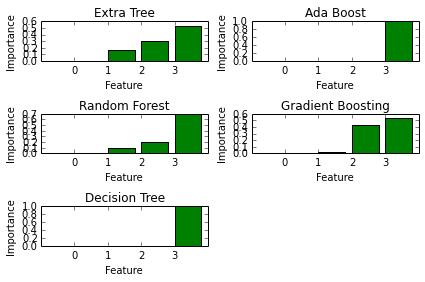

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, \
RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

class CalculateFeatureImportance(object):
    """
    Calculate the feature importance from a given data set using ensemble and 
    tree classifiers.
    """
    
    def __init__(self):
        """
        """
        self.classifiers = [ExtraTreesClassifier,GradientBoostingClassifier,\
        RandomForestClassifier,AdaBoostClassifier,DecisionTreeClassifier]
        self.mapping = ["Extra Tree","Gradient Boosting","Random Forest",\
        "Ada Boost","Decision Tree"]
    
    def feat_importance(self, X, Y):
        """
        Compute the importance
        :param X: a pandas DataFrame with features 
        :param Y: a pandas DataFrame with target values
        :returns feature_importances: a numpy array ?
        """
        
        feature_importances = dict()
        
        for clf_n in range(len(self.classifiers)):
            clf = self.classifiers[clf_n]()
            clf.fit(X,Y)
            imp_features = clf.feature_importances_
            feature_importances[self.mapping[clf_n]] = imp_features
            
        return feature_importances

    
    def plot_feat_importance(self, feat_impts):
        """
        Plot the feature importance
        :param feat_impts: Feature importance calculated by the estimator.
        """
        plot_nums = lambda x: x if x / 2 == 0 else int((x + 1) / 2)
        pnums = plot_nums(len(feat_impts))
        ax_index = 1
        
        fig = plt.figure()
        

        for name_,importance in feat_impts.items():
            indics = np.argsort(importance)[::1]
            ax_name = dict()
            ax_name["name"] = "ax_" + str(ax_index)
            ax_name["name"] = fig.add_subplot(pnums, 2, ax_index)
            ax_name["name"].bar(range(len(indics)), importance[indics], color='g')
            ax_name["name"].set_xticks(indics)
            ax_name["name"].set_xlim([-1, len(indics)])
            ax_name["name"].set_xlabel("Feature")
            ax_name["name"].set_ylabel("Importance")
            ax_name["name"].set_title(name_)
            ax_index += 1
        
        plt.tight_layout()
        plt.show()

iris = pd.read_csv("/resources/iris.csv")
Y = iris["Class"]
X = iris.drop("Class", 1)
fimp = CalculateFeatureImportance()
cfimp = fimp.feat_importance(X, Y)
fimp.plot_feat_importance(cfimp)

#### What just happened ?
The code has some level of abstraction. It is iterating fitting each estimators in the data with default parameters. Then the feature importance is plotted for visual examination. If we change the parameters for each estimator the result will vary. Try with a dataset with more attributes.

### Combining Multiple Feature Selection (Feature Union)
Sklearn provides a handy utility to combine various feature selection techniques applied above. This is facilitated through the FeatureUnion API. Let's see how FeatureUnion is working.

In [19]:
import pandas as pd

from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest


def feature_union(X,y):
    """
    Apply feature union with PCA and SelectKBest
    :param X: pandas DataFrame with attributes
    :param y: pandas Series with target variable
    :returns new_feats: pandas DataFrame with new features
    """
    
    pca = PCA(n_components=2)
    kbest = SelectKBest(k=1)
    f_union = FeatureUnion([("pca", pca), ("kbest", kbest)])
    selected_feat = f_union.fit(X,y).transform(X)
    
    new_feats = pd.DataFrame(selected_feat)
    new_feats["target"] = y
    
    return new_feats

iris = pd.read_csv("/resources/iris.csv")

Y = iris["Class"]
X = iris.drop("Class", 1)
new_f = feature_union(X,Y)

new_f.head()

,0,1,2,target
0,-2.237799,-0.296785,5.6,1
1,2.346082,-0.109259,1.6,0
2,-2.877376,0.472073,6.0,1
3,2.374624,0.205149,1.4,0
4,-2.583883,0.029046,5.6,1


#### What just happened ?
Here in this example we have used Principal Component Analysis (PCA) and SelectKBest method together in a pipeline to select the features. The PCA selected 2 features and SelectKBest selected one feature; which is original one. Alltogether the pipe-line created a new dataset with three features. This method will return a new dataset with selected features not the scores.

We can use the Grid Search hyper parameter tuning with L1 based feature selection in combination with FeatureUnion for better results. There are examples available in the sklearn documentation for the same too.

I will explain PCA in a separate note-book.

### Closing Notes
The example given here is just for demonstration sake. You can use the code with different data set and check how it is affecting the classification/regaression/clustering accuracy. I will create a separate note on how the accuracy is being improved with these tricks.

Happy hacking !!!!